In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pom import servo, ee, sim

In [ ]:
plt.style.use('default')
# plt.style.use('./Dropbox/voxels/regress/mary.mplstyle')
# plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
# EXAMPLE 1
s1 = [servo(2, 1, 1, 1, -5)] # servo(x, y, z, act_dim, displacement)
ee1 = ee(0, 1, 3, 0, s1) # end effector(x, y, z, node_id, servo_list)
ee2 = ee(1, 1, 4, 5, s1)
e =[ee1, ee2]
 
results = sim(e)
print(results)

[[ 0.  0. -5.]
 [-5.  0.  0.]]


In [4]:
# EXAMPLE 2  
s1 = servo(2, 1, 1, 1, 5) # blue, servo(x, y, z, act_dim, displacement)
s2 = servo(1, 2, 1, 0, -5) # yellow
s3 = servo(2, 3, 1, 1, 5) # red
s4 = servo(3, 3, 1, 0, -5) # green 
s=[s1, s2, s3, s4]

ee_yr = ee(1, 3, 4, 5, s) # end effector(x, y, z, node_id, servo_list)
ee_yb = ee(1, 1, 4, 5, s)
ee_gb = ee(3, 1, 4, 5, s)
ee_gr = ee(3, 3, 4, 5, s)
e = [ee_yr, ee_yb, ee_gb, ee_gr]
 
results = sim(e)
print(results)

[[ 5.  5.  0.]
 [ 5. -5.  0.]
 [-5. -5.  0.]
 [-5.  5.  0.]]


In [5]:
# EXAMPLE 3
s1 = [servo(2, 1, 1, 1, -5)] # servo(x, y, z, act_dim, displacement)
ee1 = ee(4, 1, 3, 3, s1) # end effector(x, y, z, node_id, servo_list)
ee2 = ee(1, 1, 2, 5, s1)

e =[ee1, ee2]

results = sim(e)
print(results)

[[ 0.  0.  5.]
 [-5.  0.  0.]]


# FORWARD KINEMATICS

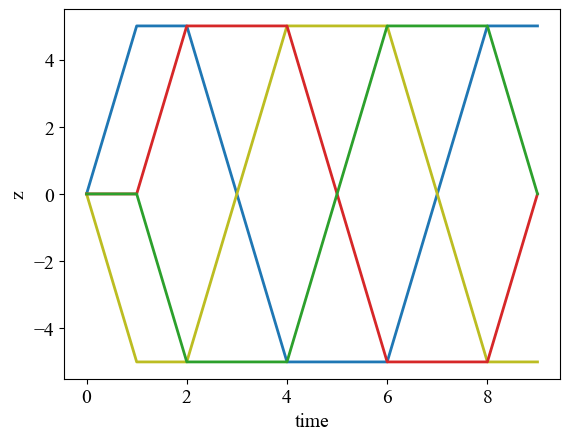

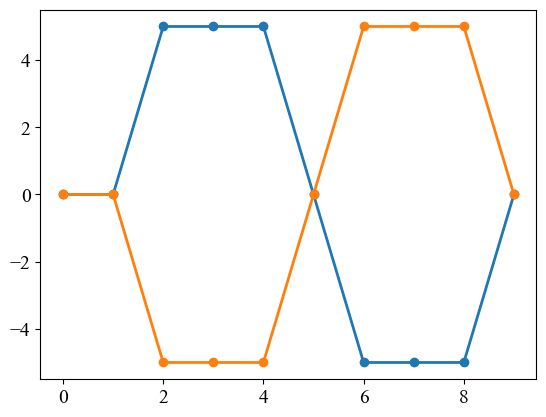

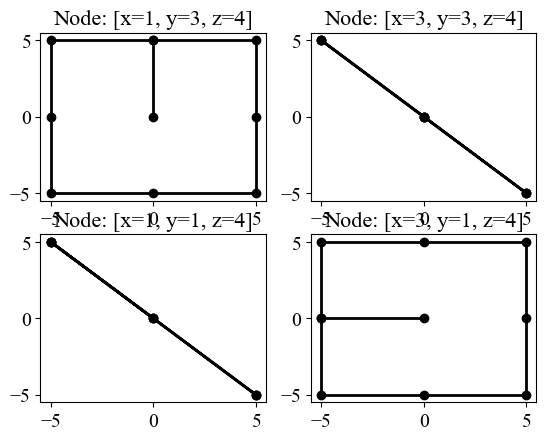

In [6]:
d=5

# cpg gait 
gait1 = (0, d,  d,  0,  -d, -d, -d, 0,  d,  d) # blue 
gait2 = (0, -d, -d, 0,  d,  d,  d,  0,  -d, -d) # yellow
gait3 = (0, 0,  d,  d,  d,  0,  -d, -d, -d,  0) # red
gait4 = (0, 0,  -d, -d, -d, 0,  d,   d,  d,  0) #green 

t=np.arange(len(gait1))  
gait = [gait1,gait2,gait3,gait4]
gaitsim=gait 

plt.plot(t, gait[0],'C0') # blue
plt.plot(t, gait[1], 'C8') # yellow 
plt.plot(t, gait[2], 'C3') # red
plt.plot(t, gait[3], 'C2') # green 
plt.xlabel('time')
actdim=['x', 'y', 'z']
plt.ylabel(actdim[2])
plt.show()

# index 0, using planes in xyz to def unique node pos
# def act dim to indicate square
# inputs = xyz plane, act dim, gait
s1 = servo(2, 1, 1, 1, gait[0]) # blue, servo(x, y, z, act_dim, displacement)
s2 = servo(1, 2, 1, 0, gait[1]) # yellow
s3 = servo(2, 3, 1, 1, gait[2]) # red
s4 = servo(3, 2, 1, 0, gait[3]) # green  
s=[s1, s2, s3, s4] 

# define one end of end effector with smaller index 
# class params: xyz plane, node id, active servo list
ee_yr = ee(1, 3, 4, 5, s) # end effector(x, y, z, node_id, servo_list)
ee_yb = ee(1, 1, 4, 5, s)
ee_gb = ee(3, 1, 4, 5, s)
ee_gr = ee(3, 3, 4, 5, s)

ee_rf = ee(4, 3, 1, 3, s)
ee_lf = ee(3, 4, 1, 4, s)
e = [ee_yr, ee_yb, ee_gb, ee_gr, ee_rf, ee_lf]
# e = [ee_yr, ee_yb, ee_gb, ee_gr]

res = sim(e, t)
    
yr = res[:len(t)]
yb = res[len(t):2*len(t)]
gb = res[2*len(t):3*len(t)]
gr = res[3*len(t):4*len(t)] 

rf = res[4*len(t):5*len(t)] 
lf = res[5*len(t):6*len(t)] 

plt.figure()
plt.plot(rf[:, 2],'o-')
plt.plot(lf[:, 2],'o-')
plt.show()

f = plt.figure()
plt.subplot(2, 2, 1)
ax = f.gca()
plt.title('Node: [x=1, y=3, z=4]')
plt.plot(yr[:, 0], yr[:, 1],'ko-')   
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])

plt.subplot(2, 2, 2)
ax = f.gca()
plt.title('Node: [x=3, y=3, z=4]')
plt.plot(gr[:, 0], gr[:, 1], 'ko-')
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])

plt.subplot(2, 2, 3)
ax = f.gca()
plt.title('Node: [x=1, y=1, z=4]')
plt.plot(yb[:, 0], yb[:, 1], 'ko-')
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])

plt.subplot(2, 2, 4)
ax = f.gca()
plt.title('Node: [x=3, y=1, z=4]')
plt.plot(gb[:, 0], gb[:, 1],'ko-')  
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])
plt.show()


# INVERSE KINEMATICS

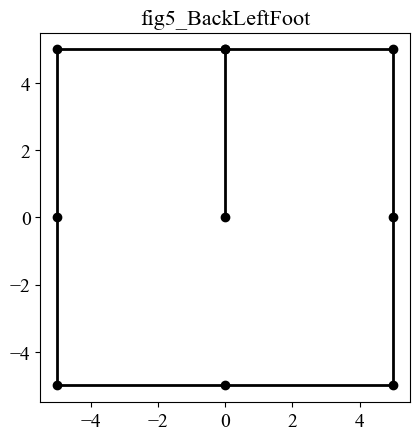

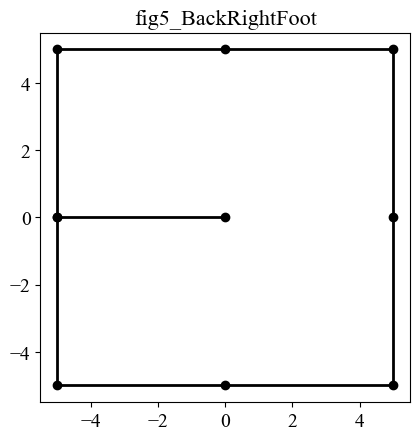

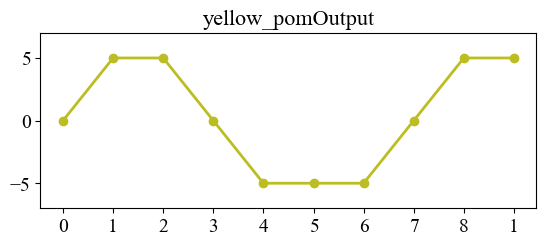

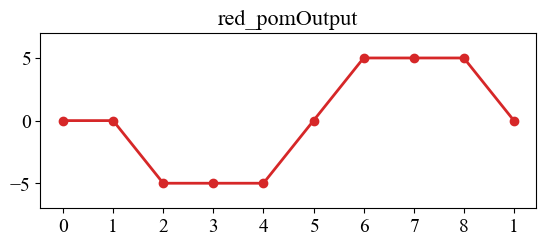

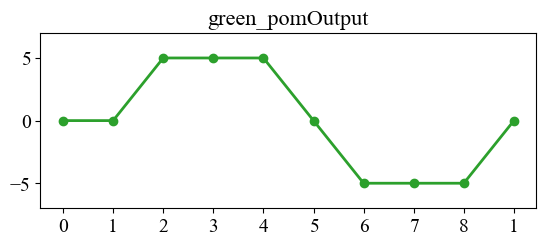

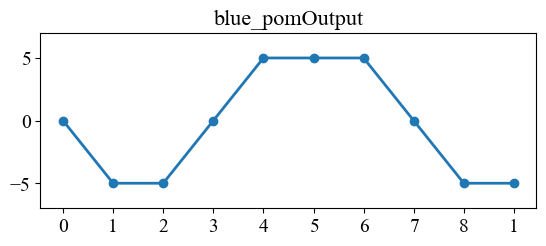

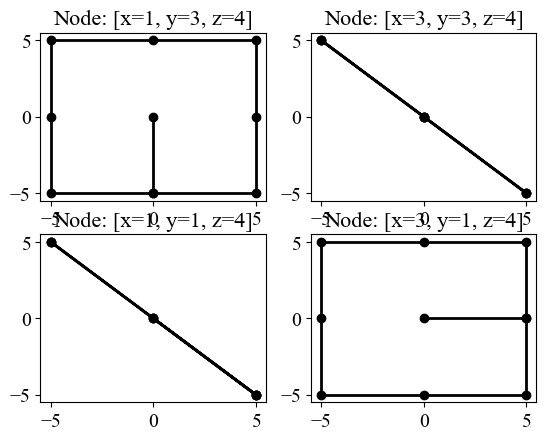

In [8]:
d=5
# Define desired end effector (foot) motions
flfoot_zg = (0, 0, d, d, d, 0, -d, -d, -d, 0)
frfoot_zg = (0, 0, -d, -d, -d, 0, d, d, d, 0)

blfoot_xg = (0, 0, -d, -d, -d, 0, d, d, d, 0)
blfoot_yg = (0, d , d, 0, -d, -d, -d, 0, d, d)
brfoot_xg = (0, -d, -d, 0, d, d, d, 0, -d, -d)  
brfoot_yg = (0, 0, d, d, d, 0, -d, -d, -d, 0) 

t=np.arange(len(flfoot_zg))  
gait = [flfoot_zg, frfoot_zg, blfoot_xg, blfoot_yg, brfoot_xg, brfoot_yg]
gaitsim=gait 

# plot foot motions
actdim=['x', 'y', 'z']
plt.plot(blfoot_xg, blfoot_yg, '-o',color='k')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('fig5_BackLeftFoot')
# plt.savefig('fig5_BackLeftFoot.png')

plt.figure()
plt.plot(brfoot_xg, brfoot_yg, '-o',color='k')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('fig5_BackRightFoot')
# plt.savefig('fig5_BackRightFoot.png')

# define end effector positions as servos 
# index 0, using planes in xyz to def unique node pos
# def act dim to indicate square
# inputs = xyz plane, act dim, gait
flfoot_z = servo(3, 4, 1, 0, gait[0])
frfoot_z = servo(4, 3, 1, 1, gait[1])
# blfoot_x = servo(1, 3, 0, 1, gait[2])
blfoot_y = servo(1, 3, 0, 0, gait[3])
brfoot_x = servo(3, 1, 0, 1, gait[4])  
# brfoot_y = servo(3, 1, 0, 0, gait[5]) 
# s = [flfoot_z, frfoot_z, blfoot_x, blfoot_y, brfoot_x, brfoot_y]
# s = [blfoot_x, blfoot_y, brfoot_x, brfoot_y]
s = [flfoot_z, frfoot_z, blfoot_y, brfoot_x ]

# define servos as end effectors
# define one end of end effector with smaller index 
# class params: xyz plane, node id, active servo list
s_y = ee(1, 2, 1, 4, s) # end effector(x, y, z, node_id, servo_list)
s_r = ee(2, 3, 1, 3, s)
s_g = ee(3, 2, 1, 4, s)
s_b = ee(2, 1, 1, 3, s) 

# marker
marker_yr = ee(1, 3, 4, 5, s) # end effector(x, y, z, node_id, servo_list)
marker_yb = ee(1, 1, 4, 5, s)
marker_gb = ee(3, 1, 4, 5, s)
marker_gr = ee(3, 3, 4, 5, s)
 
# simulate
e = [s_y, s_r, s_g, s_b, marker_yr, marker_yb, marker_gb, marker_gr] 
res = sim(e, t)
    
ee_y = res[:len(t)]
ee_r = res[len(t):2*len(t)]
ee_g = res[2*len(t):3*len(t)]               
ee_b = res[3*len(t):4*len(t)] 

yr_ik = res[4*len(t):5*len(t)]
yb_ik = res[5*len(t):6*len(t)]
gb_ik = res[6*len(t):7*len(t)]
gr_ik = res[7*len(t):8*len(t)] 
     
# yellow actuator
f = plt.figure()
plt.plot(ee_y[:, 2], 'o-', color='C8')
plt.xticks(np.arange(0, 10), ['0','1','2','3','4','5','6','7','8','1']) 
plt.yticks([ -5, 0, 5])
ax=plt.gca()
ax.set_aspect(0.25)
plt.ylim((-7, 7))
plt.title('yellow_pomOutput')
# plt.savefig('yellow_pomOutput.png')

# red actuator
f = plt.figure()
plt.plot(ee_r[:, 2], 'o-', color='C3')
plt.xticks(np.arange(0, 10), ['0','1','2','3','4','5','6','7','8','1']) 
plt.yticks([ -5, 0, 5])
ax=plt.gca()
ax.set_aspect(0.25)
plt.ylim((-7, 7))
plt.title('red_pomOutput')
# plt.savefig('red_pomOutput.png')


# green actuator
f = plt.figure()
plt.plot(ee_g[:, 2], 'o-', color='C2')
plt.xticks(np.arange(0, 10), ['0','1','2','3','4','5','6','7','8','1']) 
plt.yticks([ -5, 0, 5])
ax=plt.gca()
ax.set_aspect(0.25)
plt.ylim((-7, 7))
plt.title('green_pomOutput')
# plt.savefig('green_pomOutput.png')

# blue actuator
f = plt.figure()
plt.plot(ee_b[:, 2], 'o-', color='C0')  
plt.xticks(np.arange(0, 10), ['0','1','2','3','4','5','6','7','8','1']) 
plt.yticks([ -5, 0, 5])
ax=plt.gca()
ax.set_aspect(0.25)
plt.ylim((-7, 7))
plt.title('blue_pomOutput')
# plt.savefig('blue_pomOutput.png')
 

f = plt.figure()
plt.subplot(2, 2, 1)
ax = f.gca()
plt.title('Node: [x=1, y=3, z=4]')
plt.plot(yr_ik[:, 0], yr_ik[:, 1],'ko-')   
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])

plt.subplot(2, 2, 2)
ax = f.gca()
plt.title('Node: [x=3, y=3, z=4]')
plt.plot(gr_ik[:, 0], gr_ik[:, 1], 'ko-')
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])

plt.subplot(2, 2, 3)
ax = f.gca()
plt.title('Node: [x=1, y=1, z=4]')
plt.plot(yb_ik[:, 0], yb_ik[:, 1], 'ko-')
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])

plt.subplot(2, 2, 4)
ax = f.gca()
plt.title('Node: [x=3, y=1, z=4]')
plt.plot(gb_ik[:, 0], gb_ik[:, 1],'ko-')  
plt.xticks([ -5, 0, 5])
plt.yticks([ -5, 0, 5])
plt.show()
